In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

In [2]:
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head(1)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [7]:
#List of columns that have only one value
singlevaluedcol=[]
for i in df.columns:
    if df[i].nunique==1:
        singlevaluedcol.append(i)
        

In [8]:
singlevaluedcol

[]

In [9]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

In [10]:
#d

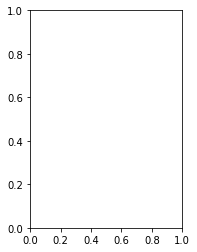

In [11]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)

Text(0.5,1,'Number of Patients males or females who did not suffer heart attacks')

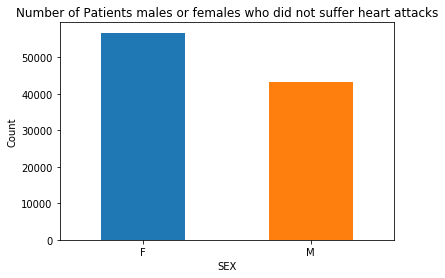

In [12]:
#Plot for Male and female count for heart attack patients
df.groupby('SEX_CD').count()['ID'].plot.bar()
plt.xlabel("SEX")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Number of Patients males or females who did not suffer heart attacks")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

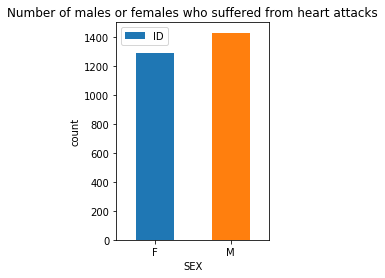

In [13]:
plt.subplot(1,2,2)
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot.bar(legend=True)
plt.xlabel("SEX")
plt.ylabel("count")
plt.title("Number of males or females who suffered from heart attacks")
plt.xticks(rotation=0)
plt.show()

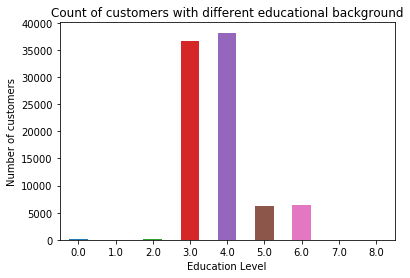

In [14]:
df.groupby('Education_level').count()['ID'].plot.bar()
plt.xlabel("Education Level")
plt.ylabel("Number of customers")
plt.title("Count of customers with different educational background")
plt.xticks(rotation=0)
plt.show()

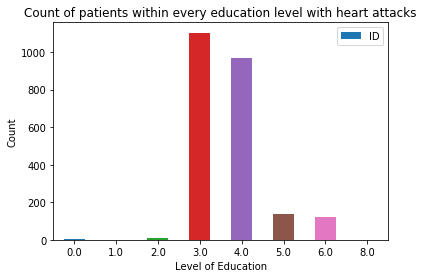

In [15]:
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Level of Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of patients within every education level with heart attacks")
plt.show()

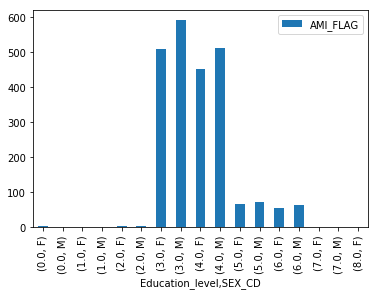

In [16]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



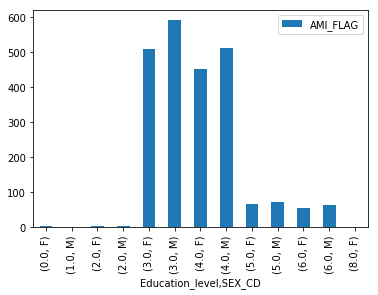

In [17]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


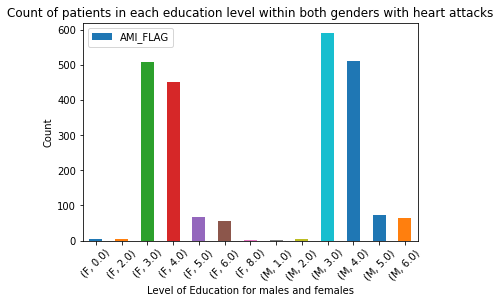

In [18]:
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot.bar(stacked=True,legend=True)
plt.xlabel("Level of Education for males and females")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of patients in each education level within both genders with heart attacks")
plt.show()

In [19]:
l=list(d.keys())

In [20]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [21]:
df.shape

(100000, 448)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [23]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

In [25]:
df.groupby('RX_THER_01_YR2016').count()['ID']

RX_THER_01_YR2016
0     81575
1     12727
2      3770
3      1150
4       410
5       185
6        79
7        35
8        25
9        15
10        9
11        6
12        4
13        4
14        1
15        1
16        2
20        1
22        1
Name: ID, dtype: int64

In [26]:
df.groupby('ORIG_REAS_ENTITLE_CD').count()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
ORIG_REAS_ENTITLE_CD,,,,,,,,,,,,,,,,,,,,,
0.0,71114,71114,71114,71114,71112,71112,71114,71114,71031,71114,...,71114,71114,71114,71114,71114,71114,71114,71114,71114,71114
1.0,28790,28790,28790,28790,28790,28790,28790,28790,28747,28790,...,28790,28790,28790,28790,28790,28790,28790,28790,28790,28790
2.0,60,60,60,60,60,60,60,60,59,60,...,60,60,60,60,60,60,60,60,60,60
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0.5,1,'Age dependency on heart attacks')

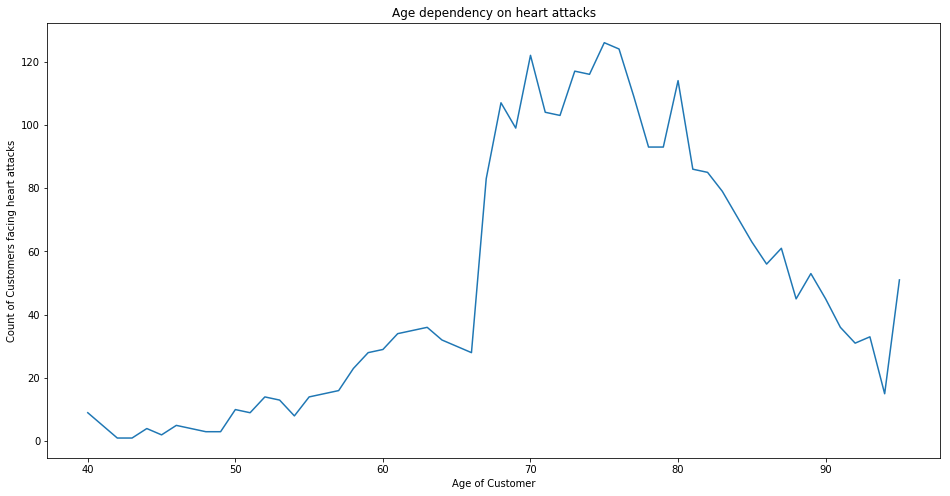

In [27]:
#Age Vs Heart attacks relationships
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(16,8))
plt.xlabel("Age of Customer")
plt.ylabel("Count of Customers facing heart attacks")
plt.title("Age dependency on heart attacks")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

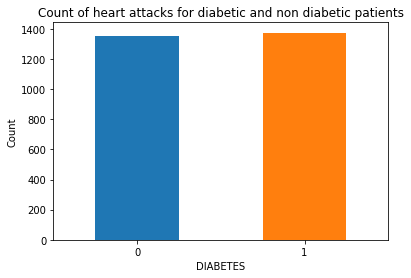

In [28]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

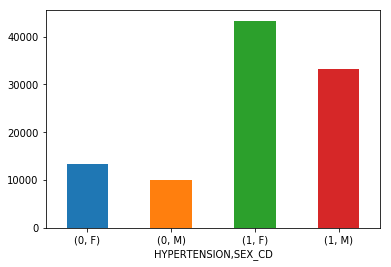

In [29]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

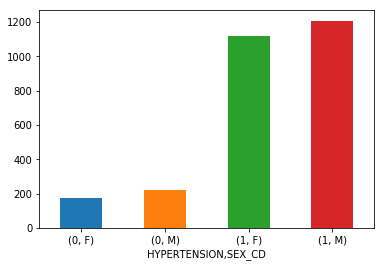

In [30]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

In [31]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.00000,0.52947
RECON_RX_RISK_SCORE_NBR,0.52947,1.00000


In [32]:
df[['CON_VISIT_01_Q01','CON_VISIT_01_Q02','CON_VISIT_01_Q03','CON_VISIT_01_Q04']].corr()

,CON_VISIT_01_Q01,CON_VISIT_01_Q02,CON_VISIT_01_Q03,CON_VISIT_01_Q04
CON_VISIT_01_Q01,1.000000,0.249303,0.126962,0.113894
CON_VISIT_01_Q02,0.249303,1.000000,0.320167,0.143733
CON_VISIT_01_Q03,0.126962,0.320167,1.000000,0.264533
CON_VISIT_01_Q04,0.113894,0.143733,0.264533,1.000000


In [33]:
df.columns

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT',
       ...
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG'],
      dtype='object', length=448)

In [34]:
df['AMI_FLAG'].fillna(0,inplace=True)

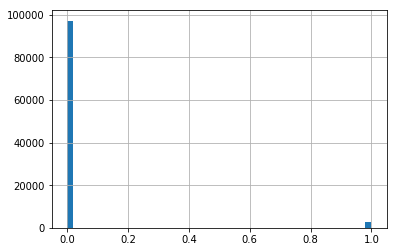

In [35]:
df['AMI_FLAG'].hist(bins=50)

In [36]:
df.dropna(axis=0,subset=['SEX_CD'],how='any',inplace=True)

In [37]:
df.dropna(axis=0,subset=['ESRD_IND'],how='any',inplace=True)

In [38]:
df.dropna(axis=0,subset=['HOSPICE_IND'],how='any',inplace=True)

In [39]:
df.dropna(axis=0,subset=['ORIG_REAS_ENTITLE_CD'],how='any',inplace=True)

In [40]:
df.dropna(axis=0,subset=['PCP_ASSIGNMENT'],how='any',inplace=True)

In [41]:
df.dropna(axis=0,subset=['DUAL'],how='any',inplace=True)

In [42]:
df.dropna(axis=0,subset=['INSTITUTIONAL'],how='any',inplace=True)

In [43]:
df.dropna(axis=0,subset=['LIS'],how='any',inplace=True)

In [44]:
df.dropna(axis=0,subset=['MCO_HLVL_PLAN_CD'],how='any',inplace=True)

In [45]:
df.dropna(axis=0,subset=['MCO_PROD_TYPE_CD'],how='any',inplace=True)

In [46]:
df.drop(axis=1,columns=['Diab_Type'],inplace=True)

In [47]:
df.drop(axis=1,columns=['Dwelling_Type'],inplace=True)

In [48]:
df.dropna(axis=0,subset=['Education_level'],how='any',inplace=True)

In [49]:
df.dropna(axis=0,subset=['Length_residence'],how='any',inplace=True)

In [50]:
df.dropna(axis=0,subset=['Est_BMI_decile'],how='any',inplace=True)

In [51]:
df.dropna(axis=0,subset=['Num_person_household'],how='any',inplace=True)

In [52]:
df.dropna(axis=0,subset=['College'],how='any',inplace=True)

In [53]:
df.dropna(axis=0,subset=['Online_purchaser'],how='any',inplace=True)

In [54]:
df.dropna(axis=0,subset=['Online_User'],how='any',inplace=True)


In [55]:
df.dropna(axis=0,subset=['Pct_above_poverty_line'],how='any',inplace=True)


In [56]:
df.dropna(axis=0,subset=['Pct_below_poverty_line'],how='any',inplace=True)

In [57]:
df.dropna(axis=0,subset=['Decile_struggle_Med_lang'],how='any',inplace=True)

In [58]:
df.dropna(axis=0,subset=['Home_value'],how='any',inplace=True)

In [59]:
df.dropna(axis=0,subset=['Est_Net_worth'],how='any',inplace=True)

In [60]:
df.dropna(axis=0,subset=['Est_income'],how='any',inplace=True)

In [61]:
df.dropna(axis=0,subset=['Index_Health_ins_engage'],how='any',inplace=True)

In [62]:
df.dropna(axis=0,subset=['Index_Health_ins_influence'],how='any',inplace=True)

In [63]:
df.dropna(axis=0,subset=['Population_density_centile_ST'],how='any',inplace=True)

In [64]:
df.dropna(axis=0,subset=['Population_density_centile_US'],how='any',inplace=True)

In [65]:
l=df.columns[df.isna().any()].tolist()

In [66]:
l

[]

In [67]:
#df.select_dtypes(include='object').columns

In [68]:
#df=pd.get_dummies(df)

In [69]:
df.select_dtypes(include='object').columns

Index(['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'PCP_ASSIGNMENT', 'DUAL',
       'INSTITUTIONAL', 'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD'],
      dtype='object')

In [70]:
#Tranforming continuous columns "CON_VISIT_0XXXX" into categorical levels
#for i in range(1,34):
#    try:    
#        if i<10:
#            s='CON_VISIT_0' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#                df[col]=df[col].astype('object')
#        else:
#            s='CON_VISIT_' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#               df[col]=df[col].astype('object')
#    except:
#        continue


In [71]:
#df['CON_VISIT_01']=df['CON_VISIT_01_Q01']+df['CON_VISIT_01_Q02']+df['CON_VISIT_01_Q03']+df['CON_VISIT_01_Q04']

In [72]:
colnames=[]
for i in range(1,34):
    if i <10:
        s='CON_VISIT_0' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue
    else:
        s='CON_VISIT_' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue

In [73]:
df.drop(axis=1,columns='CON_VISIT_29',inplace=True)

In [74]:
colnames=[]
for i in range(1,100):
    if i <10:
        s='POT_VISIT_0' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue
    else:
        s='POT_VISIT_' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue

In [75]:
filter_col = [col for col in df if col.startswith('POT_VISIT')]
for col in filter_col:
    if df[col].nunique()==1:
        df.drop(axis=1,columns=col,inplace=True)
    else:
        continue

In [76]:
df['CV_CAD']=df['CV_CAD'].astype('object')

In [77]:
df['CV_CER']=df['CV_CER'].astype('object')

In [78]:
df['CV_CHF']=df['CV_CHF'].astype('object')

In [79]:
df['CV_CIR']=df['CV_CIR'].astype('object')

In [80]:
df['CV_HDZ']=df['CV_HDZ'].astype('object')

In [81]:
df['CV_PVD']=df['CV_PVD'].astype('object')

In [82]:
df['CV_SNS']=df['CV_SNS'].astype('object')

In [83]:
df.select_dtypes(include='int64').columns[100:150]

Index(['PREDIABETES', 'HYPERTENSION', 'HYPERLIPID', 'RENAL', 'CKD', 'ESRD',
       'MUSCUL_OTH', 'MUSCUL_BN', 'OSTEO', 'ARTH', 'CDC', 'CDC_HBATEST_GAP',
       'CDC_HBAPOOR_GAP', 'CDC_NPH_GAP', 'CDC_EYE_GAP', 'BCS', 'BCS_GAP',
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG', 'CON_VISIT_01',
       'CON_VISIT_02', 'CON_VISIT_03', 'CON_VISIT_04', 'CON_VISIT_05',
       'CON_VISIT_06', 'CON_VISIT_07', 'CON_VISIT_08', 'CON_VISIT_09',
       'CON_VISIT_10', 'CON_VISIT_11', 'CON_VISIT_12', 'CON_VISIT_13',
       'CON_VISIT_14', 'CON_VISIT_15', 'CON_VISIT_16', 'CON_VISIT_17',
       'CON_VISIT_18', 'CON_VISIT_19', 'CON_VISIT_20', 'CON_VISIT_21',
       'CON_VISIT_22', 'CON_VISIT_23'],
      dtype='object')

In [84]:
df['RES_ALG']=df['RES_ALG'].astype('object')

In [85]:
df['RES_AST']=df['RES_AST'].astype('object')

In [86]:
df['RES_COPD']=df['RES_COPD'].astype('object')

In [87]:
df['RES_FAIL']=df['RES_FAIL'].astype('object')

In [88]:
df['RES_INF']=df['RES_INF'].astype('object')

In [89]:
df['DIABETES']=df['DIABETES'].astype('object')

In [90]:
df['Diab_Complications']=df['Diab_Complications'].astype('object')

In [91]:
df['MUSCUL_BN']=df['MUSCUL_BN'].astype('object')

In [92]:
df['MUSCUL_OTH']=df['MUSCUL_OTH'].astype('object')

In [93]:
#df.select_dtypes(include='int64').columns[50:100]

In [94]:
df['PREDIABETES']=df['PREDIABETES'].astype('object')

In [95]:
df['HYPERTENSION']=df['HYPERTENSION'].astype('object')

In [96]:
df['HYPERLIPID']=df['HYPERLIPID'].astype('object')

In [97]:
df['RENAL']=df['RENAL'].astype('object')

In [98]:
df['CKD']=df['CKD'].astype('object')

In [99]:
df['OSTEO']=df['OSTEO'].astype('object')

In [100]:
df.select_dtypes(include='int64').columns[50:100]

Index(['RX_THER_54_YR2016', 'RX_THER_31_YR2016', 'RX_THER_83_YR2016',
       'RX_THER_13_YR2016', 'RX_THER_35_YR2016', 'RX_THER_89_YR2016',
       'RX_THER_78_YR2016', 'RX_THER_53_YR2016', 'RX_THER_77_YR2016',
       'RX_THER_88_YR2016', 'RX_THER_23_YR2016', 'RX_THER_52_YR2016',
       'RX_THER_73_YR2016', 'RX_THER_99_YR2016', 'RX_THER_82_YR2016',
       'RX_THER_07_YR2016', 'RX_THER_93_YR2016', 'RX_THER_74_YR2016',
       'RX_THER_55_YR2016', 'RX_THER_24_YR2016', 'RX_THER_67_YR2016',
       'RX_THER_64_YR2016', 'RX_THER_87_YR2016', 'RX_THER_47_YR2016',
       'RX_THER_38_YR2016', 'RX_THER_40_YR2016', 'RX_THER_09_YR2016',
       'RX_THER_51_YR2016', 'RX_THER_26_YR2016', 'RX_THER_25_YR2016',
       'RX_THER_81_YR2016', 'RX_THER_48_YR2016', 'RX_THER_95_YR2016',
       'RX_THER_45_YR2016', 'RX_THER_76_YR2016', 'RX_THER_80_YR2016',
       'RX_THER_15_YR2016', 'RX_THER_19_YR2016', 'RX_THER_96_YR2016',
       'RX_THER_92_YR2016', 'RX_THER_98_YR2016', 'RX_THER_84_YR2016',
       'RX_THER_08_Y

In [101]:
df['ESRD']=df['ESRD'].astype('object')
df['ARTH']=df['ARTH'].astype('object')
df['CDC']=df['CDC'].astype('object')
df['CDC_EYE_GAP']=df['CDC_EYE_GAP'].astype('object')
df['CDC_HBAPOOR_GAP']=df['CDC_HBAPOOR_GAP'].astype('object')
df['CDC_HBATEST_GAP']=df['CDC_HBATEST_GAP'].astype('object')
df['CDC_NPH_GAP']=df['CDC_NPH_GAP'].astype('object')

In [102]:
df['BCS']=df['BCS'].astype('object')
df['BCS_GAP']=df['BCS_GAP'].astype('object')
df['COL']=df['COL'].astype('object')
df['COL_GAP']=df['COL_GAP'].astype('object')
df['AMM']=df['AMM'].astype('object')
df['AMM_GAP']=df['AMM_GAP'].astype('object')
df['DIAB_PASS']=df['DIAB_PASS'].astype('object')
df['DIAB_ELIG']=df['DIAB_ELIG'].astype('object')


In [103]:
df['ACE_PASS']=df['ACE_PASS'].astype('object')
df['ACE_ELIG']=df['ACE_ELIG'].astype('object')
df['STATIN_ELIG']=df['STATIN_ELIG'].astype('object')
df['STATIN_PASS']=df['STATIN_PASS'].astype('object')


In [104]:
df.select_dtypes(include='int64').columns

Index(['ID', 'AGE', 'AMI_FLAG', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016', 'RX_THER_90_YR2016',
       ...
       'POT_VISIT_56', 'POT_VISIT_57', 'POT_VISIT_60', 'POT_VISIT_61',
       'POT_VISIT_62', 'POT_VISIT_65', 'POT_VISIT_71', 'POT_VISIT_72',
       'POT_VISIT_81', 'POT_VISIT_99'],
      dtype='object', length=167)

In [105]:
#pd.get_dummies(df,columns=df.select_dtypes(include='object').columns)
#df.dtypes

In [106]:
df=pd.get_dummies(df)

In [107]:
t=list(df.columns)
tmp=df.columns[df.columns.get_loc('AMI_FLAG')]

t.append(tmp)


del t[df.columns.get_loc('AMI_FLAG')]

df=df[t]

In [108]:
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]

In [109]:
X.shape

(74670, 288)

In [110]:
y.shape

(74670,)

In [111]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=25)

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[14542,     1],
       [  391,     0]], dtype=int64)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
predictions=lr.predict(X_test)

In [116]:
confusion_matrix(y_test,predictions)

array([[14537,     6],
       [  391,     0]], dtype=int64)

In [117]:
y_test.value_counts()

0    14543
1      391
Name: AMI_FLAG, dtype: int64

In [118]:
from sklearn import tree

In [119]:
clf_tree=tree.DecisionTreeClassifier(random_state=42)

In [120]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [121]:
predictions=clf_tree.predict(X_test)

In [122]:
confusion_matrix(y_test,predictions)

array([[14063,   480],
       [  365,    26]], dtype=int64)

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
gb=GradientBoostingClassifier()

In [125]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [126]:
predictions=gb.predict(X_test)

In [127]:
confusion_matrix(y_test,predictions)

array([[14531,    12],
       [  390,     1]], dtype=int64)

In [128]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.000000,0.534363
RECON_RX_RISK_SCORE_NBR,0.534363,1.000000


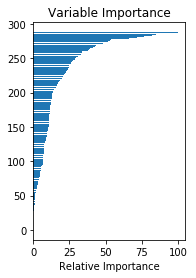

In [129]:
feature_importance=rf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [130]:
#X.iloc[:,sorted_idx[0:200]].columns

In [131]:
#X=X.iloc[:,sorted_idx[0:300]]

In [132]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
sns.set(color_codes=True)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


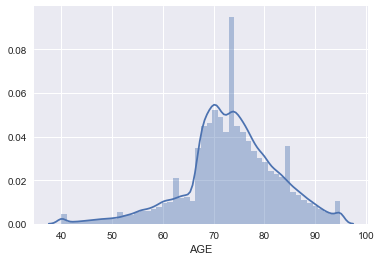

In [134]:
sns.distplot(X['AGE'])

In [135]:
X['RECON_MA_RISK_SCORE_NBR']=X['RECON_MA_RISK_SCORE_NBR']+np.mean(X['RECON_MA_RISK_SCORE_NBR'])

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


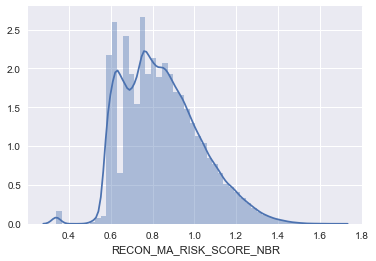

In [136]:
sns.distplot(np.sqrt(np.log(X['RECON_MA_RISK_SCORE_NBR'])))

In [137]:
X.columns

Index(['AGE', 'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016',
       ...
       'ACE_PASS_0', 'ACE_PASS_1', 'STATIN_PASS_0', 'STATIN_PASS_1',
       'ACE_ELIG_0', 'ACE_ELIG_1', 'DIAB_ELIG_0', 'DIAB_ELIG_1',
       'STATIN_ELIG_0', 'STATIN_ELIG_1'],
      dtype='object', length=288)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


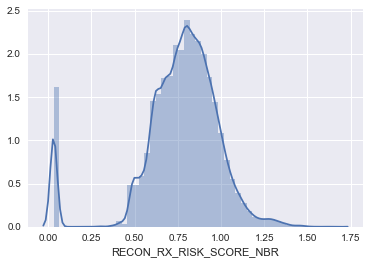

In [138]:
sns.distplot(np.sqrt(np.log(df['RECON_RX_RISK_SCORE_NBR']+np.nanmean(df['RECON_RX_RISK_SCORE_NBR']))))

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


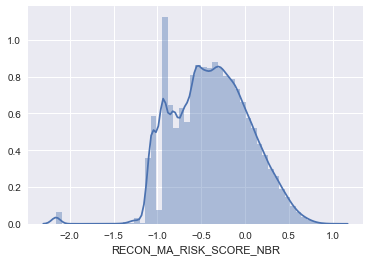

In [139]:
sns.distplot(np.log(np.log(df['RECON_MA_RISK_SCORE_NBR']+np.nanmean(df['RECON_MA_RISK_SCORE_NBR']))))

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


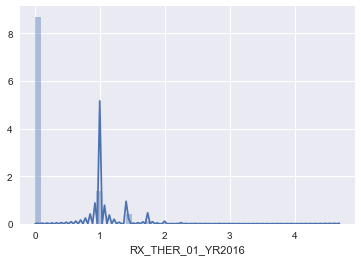

In [140]:
sns.distplot(np.sqrt(df['RX_THER_01_YR2016']))

In [141]:
#X=df.iloc[:,1:len(df.columns)-1]
#y=df.iloc[:,-1]

In [142]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf_tree=tree.DecisionTreeClassifier()

clf_tree.fit(X_train,y_train)

predictions=clf_tree.predict(X_test)

confusion_matrix(y_test,predictions)

array([[14044,   499],
       [  362,    29]], dtype=int64)

In [143]:
from sklearn.metrics import precision_score,recall_score

In [144]:
precision_score(y_test,predictions)

0.054924242424242424

In [145]:
recall_score(y_test,predictions)

0.0741687979539642

In [180]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions=gnb.predict(X_test)

In [181]:
confusion_matrix(y_test,predictions)

array([[14542,     1],
       [  391,     0]], dtype=int64)

In [182]:
precision_score(y_test,predictions)

0.0

In [183]:
recall_score(y_test,predictions)

0.0

In [152]:
from sklearn.metrics import roc_auc_score

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [154]:
predictions=lda.predict(X_test)

In [155]:
confusion_matrix(y_test,predictions)

array([[14453,    90],
       [  380,    11]], dtype=int64)

In [156]:
precision_score(y_test,predictions)

0.10891089108910891

In [163]:
df.select_dtypes(include='int64').columns

Index(['ID', 'AGE', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016', 'RX_THER_90_YR2016', 'RX_THER_01_YR2016',
       ...
       'POT_VISIT_57', 'POT_VISIT_60', 'POT_VISIT_61', 'POT_VISIT_62',
       'POT_VISIT_65', 'POT_VISIT_71', 'POT_VISIT_72', 'POT_VISIT_81',
       'POT_VISIT_99', 'AMI_FLAG'],
      dtype='object', length=167)

In [391]:
#Work on Gaussian Naive bayes and Linear Discriminant analysis to improve precision and recall score